In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from statannotations.Annotator import Annotator

from mechcell import displacement

fontsize = 13

plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial"],
        "axes.labelsize": fontsize,
        "legend.fontsize": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "axes.titlesize": fontsize,
        "legend.handlelength": 2,
    }
)

### Reading the tracking data

In [3]:
tracks = pd.read_csv("../../data/hela_tracking_data/tracks_all_conf_nc.csv")
tracks = tracks.drop("Unnamed: 0", axis=1)
tracks

,Condensate ID,x_corr,y_corr,frame,area_cond,Frames visible,t,Condition,Video
0,1,-5.227800,0.950199,0,421,10,0,Non-Confined,8104
1,1,-5.334103,0.429437,1,386,10,1,Non-Confined,8104
2,1,-5.339330,-0.531052,2,523,10,2,Non-Confined,8104
3,1,-5.062690,-1.637142,3,410,10,3,Non-Confined,8104
4,1,-4.470663,-2.484570,4,407,10,4,Non-Confined,8104
...,...,...,...,...,...,...,...,...,...
1354,75,0.328868,0.578993,5,286,9,4,Confined,3626
1355,75,0.104523,0.875695,10,312,9,5,Confined,3626
1356,75,0.381766,0.640583,11,437,9,6,Confined,3626
1357,75,-0.011729,0.758711,12,385,9,7,Confined,3626


### Roseplot

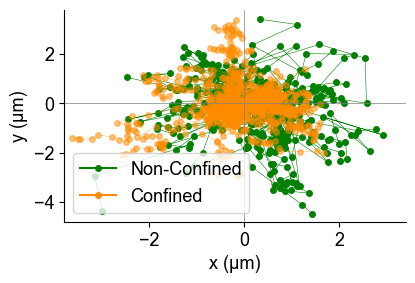

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define figure size in millimeters
fig_width_mm = 112
fig_height_mm = 70

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_in = fig_width_mm / 25.4
fig_height_in = fig_height_mm / 25.4

# Set the figure size in inches
plt.figure(figsize=(fig_width_in, fig_height_in))

# Plotting for Non-Confined condensates
for condensate_id in tracks[tracks["Condition"] == "Non-Confined"]["Condensate ID"].unique():
    cond_data = tracks[(tracks["Condensate ID"] == condensate_id) & (tracks["Condition"] == "Non-Confined")].copy()

    # Subtract the track by setting the first point to (0, 0) and subtracting the rest
    cond_data.loc[:, "x_corr"] = cond_data["x_corr"] - cond_data["x_corr"].iloc[0]
    cond_data.loc[:, "y_corr"] = cond_data["y_corr"] - cond_data["y_corr"].iloc[0]

    # Plot in polar coordinates with green color
    plt.plot(cond_data["x_corr"], cond_data["y_corr"], "o-", linewidth=0.4, markersize=4, color="green", alpha=1)

# Plotting for Confined condensates
for condensate_id in tracks[tracks["Condition"] == "Confined"]["Condensate ID"].unique():
    cond_data = tracks[(tracks["Condensate ID"] == condensate_id) & (tracks["Condition"] == "Confined")].copy()

    # Subtract the track by setting the first point to (0, 0) and subtracting the rest
    cond_data.loc[:, "x_corr"] = cond_data["x_corr"] - cond_data["x_corr"].iloc[0]
    cond_data.loc[:, "y_corr"] = cond_data["y_corr"] - cond_data["y_corr"].iloc[0]

    # Plot in polar coordinates with dark orange color
    plt.plot(cond_data["x_corr"], cond_data["y_corr"], "o-", linewidth=0.4, markersize=4, color="darkorange", alpha=0.5)

# Set legend labels and colors
legend_labels = ["Non-Confined", "Confined"]
legend_colors = ["green", "darkorange"]

# Create custom legend with line styles
dot_handles = [plt.Line2D([0], [0], marker="o", color=color, markersize=4) for color in legend_colors]
line_handles = [plt.Line2D([0], [0], linestyle="-", color=color, linewidth=0.5) for color in legend_colors]

# Place the legend at the top-left corner
plt.legend(dot_handles + line_handles, legend_labels, loc="lower left")

# Remove grid lines
plt.grid(False)

# Make the grid lines at 0 thicker
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)

plt.xlim(-3.8, 3.4)
plt.ylim(-4.8, 3.8)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.xlabel("x (µm)")
plt.ylabel("y (µm)")

plt.savefig("../../Figures/Figure4/Figure4C.pdf", bbox_inches="tight", dpi=300)
plt.show()

### Boxplots

In [5]:
tracks_sel = tracks[["Condensate ID", "Frames visible", "Condition"]]
tracks_sel = tracks_sel.drop_duplicates()
tracks_sel["time"] = (tracks_sel["Frames visible"] - 1) * 30

df_tracks_nc = tracks.loc[tracks["Condition"] == "Non-Confined"]
df_tracks_conf = tracks.loc[tracks["Condition"] == "Confined"]

In [6]:
cids = df_tracks_nc["Condensate ID"].unique()

dsums_nc = []
davgs_nc = []
time_visible_nc = []

for cid in cids:
    frames, ds = displacement(df_tracks_nc, cid)
    dsum = np.sum(ds)
    davg = dsum / frames[-1]

    print(frames[-1])

    dsums_nc.append(dsum)
    davgs_nc.append(davg)
    time_visible_nc.append(frames[-1])
    print(f"{cid=}, {dsum=}, {davg=}")

9
cid=1, dsum=7.44371765639324, davg=0.8270797395992489
9
cid=2, dsum=7.230805191989688, davg=0.8034227991099654
6
cid=3, dsum=6.1408847331936585, davg=1.0234807888656097
9
cid=4, dsum=6.941206875935492, davg=0.771245208437277
19
cid=6, dsum=15.58934930904825, davg=0.8204920688972763
4
cid=7, dsum=2.2151800400836694, davg=0.5537950100209174
14
cid=8, dsum=10.619329875706203, davg=0.7585235625504431
18
cid=9, dsum=14.073408364672227, davg=0.7818560202595681
18
cid=10, dsum=19.380216209706386, davg=1.0766786783170215
20
cid=11, dsum=15.431615028859067, davg=0.7715807514429533
20
cid=12, dsum=16.36576279917773, davg=0.8182881399588865
10
cid=13, dsum=6.340583390825536, davg=0.6340583390825536
14
cid=14, dsum=11.690754291229645, davg=0.8350538779449747
17
cid=15, dsum=23.508530347213796, davg=1.382854726306694
9
cid=16, dsum=6.779208897548308, davg=0.7532454330609232
14
cid=17, dsum=13.886736305991246, davg=0.9919097361422319
9
cid=18, dsum=10.380150197273405, davg=1.1533500219192672
21
ci

In [7]:
cids = df_tracks_conf["Condensate ID"].unique()

dsums_conf = []
davgs_conf = []
time_visible_conf = []

for cid in cids:
    frames, ds = displacement(df_tracks_conf, cid)
    dsum = np.sum(ds)
    davg = dsum / frames[-1]

    print(frames[-1])

    dsums_conf.append(dsum)
    davgs_conf.append(davg)
    time_visible_conf.append(frames[-1])
    print(f"{cid=}, {dsum=}, {davg=}")

10
cid=34, dsum=4.379234449195171, davg=0.4379234449195171
13
cid=35, dsum=7.233556887205328, davg=0.5564274528619483
17
cid=36, dsum=8.09411326957999, davg=0.47612430997529354
29
cid=37, dsum=6.927448221441181, davg=0.23887752487728212
12
cid=38, dsum=4.228316421773777, davg=0.35235970181448145
7
cid=39, dsum=2.3131349166290343, davg=0.3304478452327192
27
cid=40, dsum=6.411805396010127, davg=0.237474273926301
26
cid=41, dsum=3.470866062654334, davg=0.13349484856362823
12
cid=42, dsum=2.7060592256247977, davg=0.22550493546873315
13
cid=43, dsum=4.011541676667277, davg=0.30858012897440595
31
cid=44, dsum=7.24697898275525, davg=0.23377351557275
31
cid=45, dsum=10.843521116141268, davg=0.3497910037464925
29
cid=46, dsum=9.93356505355231, davg=0.3425367259845624
7
cid=47, dsum=2.9627854705890524, davg=0.4232550672270075
29
cid=48, dsum=9.623111110944933, davg=0.3318314176187908
30
cid=49, dsum=10.427161841969134, davg=0.3475720613989711
30
cid=50, dsum=9.672147587725906, davg=0.32240491959

In [8]:
df_nc = pd.DataFrame({"sum_dist": dsums_nc, "avg_frame": davgs_nc, "time_visible": time_visible_nc})

df_nc["Condition"] = "Non-Confined"
df_nc

,sum_dist,avg_frame,time_visible,Condition
0,7.443718,0.827080,9,Non-Confined
1,7.230805,0.803423,9,Non-Confined
2,6.140885,1.023481,6,Non-Confined
3,6.941207,0.771245,9,Non-Confined
4,15.589349,0.820492,19,Non-Confined
5,2.215180,0.553795,4,Non-Confined
6,10.619330,0.758524,14,Non-Confined
7,14.073408,0.781856,18,Non-Confined
8,19.380216,1.076679,18,Non-Confined
9,15.431615,0.771581,20,Non-Confined


In [9]:
df_conf = pd.DataFrame({"sum_dist": dsums_conf, "avg_frame": davgs_conf, "time_visible": time_visible_conf})

df_conf["Condition"] = "Confined"
df_conf

,sum_dist,avg_frame,time_visible,Condition
0,4.379234,0.437923,10,Confined
1,7.233557,0.556427,13,Confined
2,8.094113,0.476124,17,Confined
3,6.927448,0.238878,29,Confined
4,4.228316,0.352360,12,Confined
5,2.313135,0.330448,7,Confined
6,6.411805,0.237474,27,Confined
7,3.470866,0.133495,26,Confined
8,2.706059,0.225505,12,Confined
9,4.011542,0.308580,13,Confined


In [10]:
dfs = [df_nc, df_conf]

df = pd.concat(dfs)
df = df.reset_index()

df["time_visible_h"] = df["time_visible"] / 60
df

,index,sum_dist,avg_frame,time_visible,Condition,time_visible_h
0,0,7.443718,0.827080,9,Non-Confined,0.150000
1,1,7.230805,0.803423,9,Non-Confined,0.150000
2,2,6.140885,1.023481,6,Non-Confined,0.100000
3,3,6.941207,0.771245,9,Non-Confined,0.150000
4,4,15.589349,0.820492,19,Non-Confined,0.316667
...,...,...,...,...,...,...
69,37,8.533418,0.426671,20,Confined,0.333333
70,38,7.133208,0.274354,26,Confined,0.433333
71,39,8.176912,0.314497,26,Confined,0.433333
72,40,6.220221,0.388764,16,Confined,0.266667


/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_35051/4190801256.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x="Condition", y=feature, order=labels, palette=my_pal, ax=ax, size=5)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_35051/4190801256.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_confiner_labels)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-Confined vs. Confined: Mann-Whitney-Wilcoxon test two-sided, P_val:1.872e-11 U_stat=1.288e+03


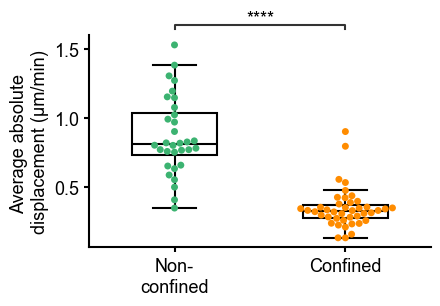

In [13]:
# Specify width and height in millimeters
fig_width_mm = 112
fig_height_mm = 70

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_in = fig_width_mm / 25.4
fig_height_in = fig_height_mm / 25.4

# Create a figure with the specified size
fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in))

labels = ["Non-Confined", "Confined"]
my_pal = {labels[0]: "mediumseagreen", labels[1]: "darkorange"}

lw_box = 1.5

feature = "avg_frame"
sns.boxplot(
    data=df,
    x="Condition",
    order=labels,
    y=feature,
    # palette=my_pal,
    color="white",
    width=0.5,
    boxprops=dict(edgecolor="black", linewidth=lw_box),
    capprops=dict(color="black", linewidth=lw_box),
    whiskerprops=dict(color="black", linewidth=lw_box),
    medianprops=dict(color="black", linewidth=lw_box),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=ax,
)

sns.swarmplot(data=df, x="Condition", y=feature, order=labels, palette=my_pal, ax=ax, size=5)

ax.set(xlabel=None)

pairs = [(labels[0], labels[1])]

annotator = Annotator(ax=ax, pairs=pairs, data=df, x="Condition", y=feature, order=labels)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

lw = 1.5

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
ax.spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
ax.tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

for p in ax.texts:
    p.set_fontsize(fontsize)  # Adjust the fontsize as needed

new_confiner_labels = ["Non-\nconfined", "Confined"]
ax.set_xticklabels(new_confiner_labels)
ax.set_ylabel("Average absolute \ndisplacement (μm/min)")

plt.savefig("../../Figures/Figure4/Figure4D.pdf", bbox_inches="tight", dpi=300)

plt.show()

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_35051/1136148933.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x="Condition", y=feature, order=labels, palette=my_pal,
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_35051/1136148933.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x="Condition", y=feature, order=labels, palette=my_pal,


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-Confined vs. Confined: Mann-Whitney-Wilcoxon test two-sided, P_val:7.306e-05 U_stat=1.036e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-Confined vs. Confined: Mann-Whitney-Wilcoxon test two-sided, P_val:1.041e-02 U_stat=4.370e+02


/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_35051/1136148933.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_confiner_labels)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_35051/1136148933.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(new_confiner_labels)


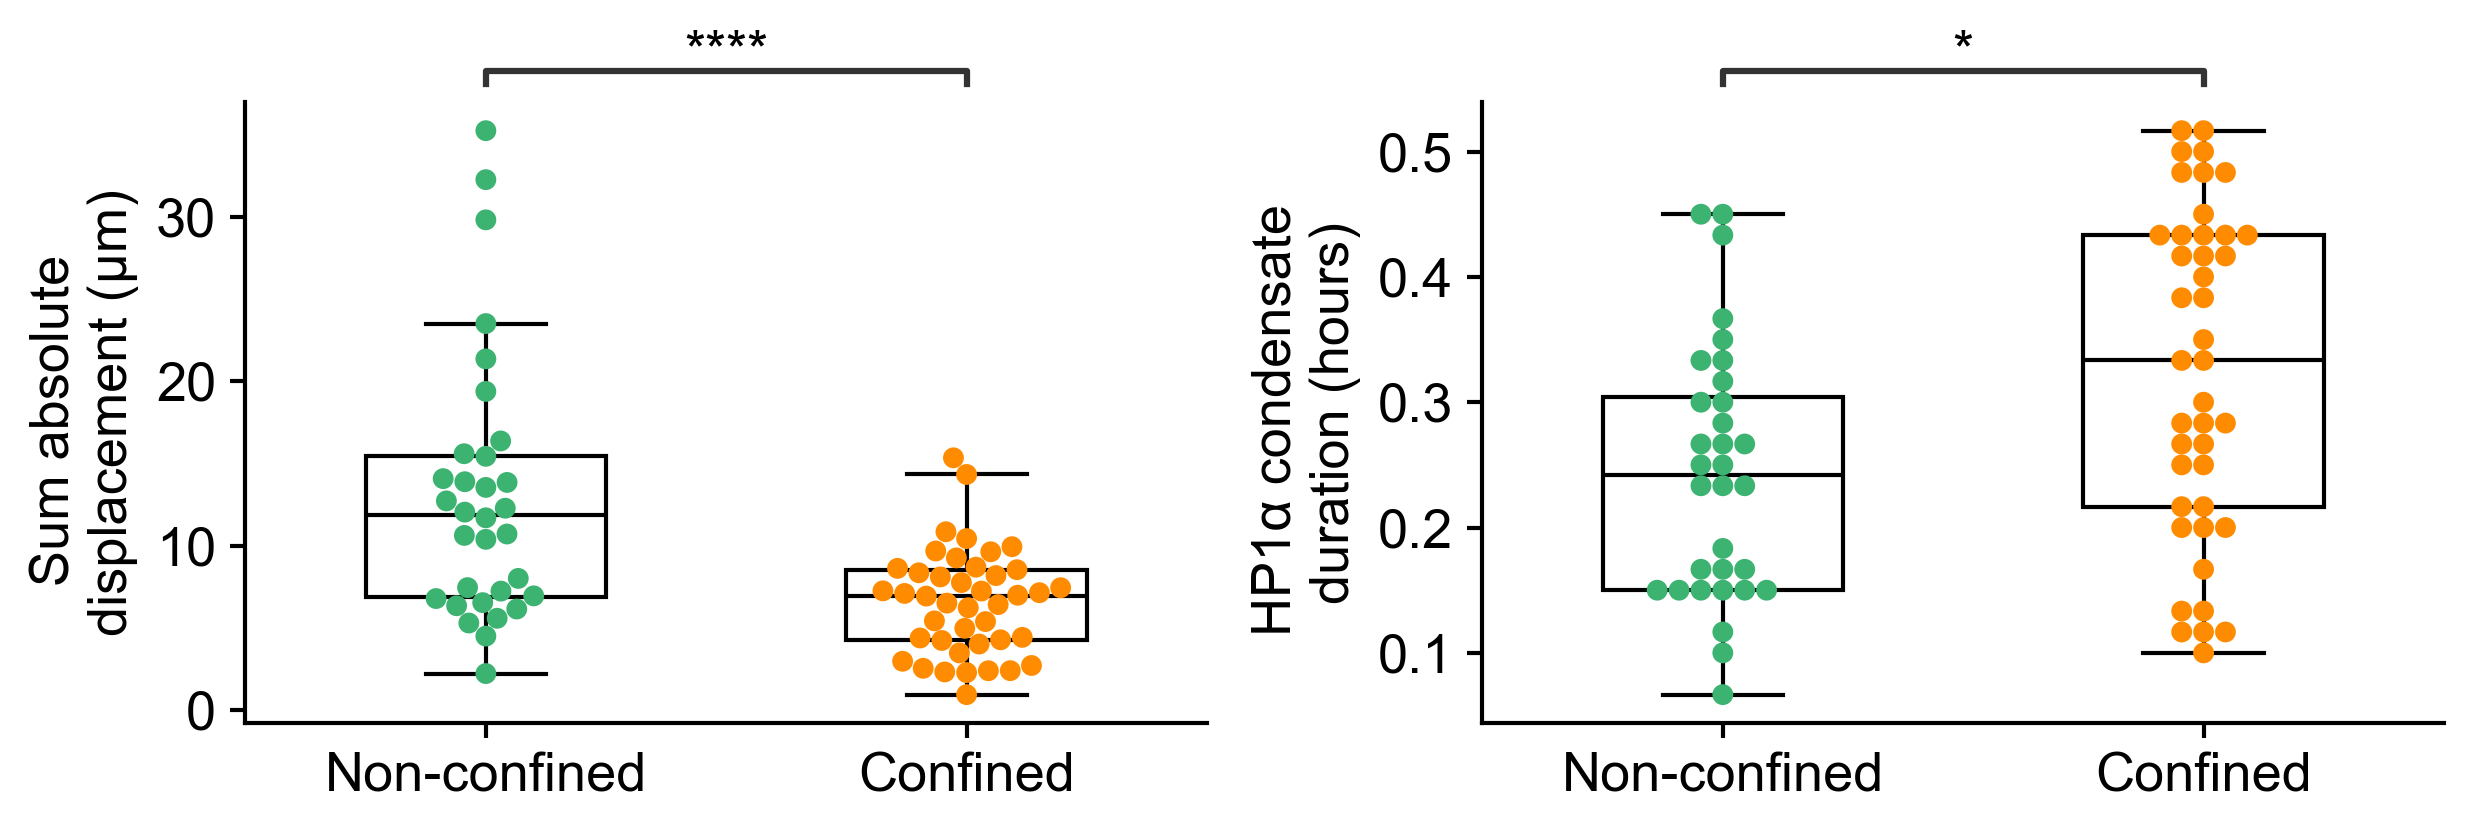

In [15]:
# Specify width and height in millimeters
fig_width_mm = 212
fig_height_mm = 73

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=False
)

labels = ["Non-Confined", "Confined"]
my_pal = {labels[0]: "mediumseagreen", labels[1]: "darkorange"}

feature = "sum_dist"
sns.boxplot(
    data=df,
    x="Condition",
    order=labels,
    y=feature,
    # palette=my_pal,
    color="white",
    width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[0],
)

sns.swarmplot(data=df, x="Condition", y=feature, order=labels, palette=my_pal, ax=axes[0], size=5)

# axes[0].set_ylim(0, 1.5)
axes[0].set(xlabel=None)


pairs = [(labels[0], labels[1])]

annotator = Annotator(ax=axes[0], pairs=pairs, data=df, x="Condition", y=feature, order=labels)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()


feature = "time_visible_h"
sns.boxplot(
    data=df,
    x="Condition",
    order=labels,
    y=feature,
    # palette=my_pal,
    color="white",
    width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[1],
)


sns.swarmplot(data=df, x="Condition", y=feature, order=labels, palette=my_pal, ax=axes[1], size=5)


pairs = [(labels[0], labels[1])]

annotator = Annotator(ax=axes[1], pairs=pairs, data=df, x="Condition", y=feature, order=labels)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

lw = 1

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[0].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[0].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[1].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[1].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

for p in axes[0].texts:
    p.set_fontsize(fontsize)  # Adjust the fontsize as needed

for p in axes[1].texts:
    p.set_fontsize(fontsize)

new_confiner_labels = ["Non-confined", "Confined"]

axes[0].set(xlabel=None)
axes[1].set(xlabel=None)

axes[0].set_xticklabels(new_confiner_labels)
axes[1].set_xticklabels(new_confiner_labels)


# axes[0].set(ylabel='Average absolute displacement per frame')
axes[1].set_ylabel("HP1α condensate \nduration (hours)")
# axes[0].set_ylabel("Average absolute \ndisplacement (μm/min)")
axes[0].set_ylabel("Sum absolute \ndisplacement (μm)")


plt.savefig("../../Figures/Supplementary/Figure6.pdf", bbox_inches="tight", dpi=300)
plt.show()